# 1 Implementing Coordinate Descent

<h3>Coordinate Descent

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
with open('regression.npy', 'rb') as f:
    X = np.load(f)
    y = np.load(f)
X = (X-np.mean(X))/np.std(X) # NORMALIZING HERE
y = y.reshape(-1,1)

In [34]:
def costf(X, y, param):
    return np.sum((X.dot(param) - y) ** 2)/(len(y))

Optimized Betas are:  [[3.6754329476150303], [-0.02627847102619735], [20.239392437708915], [-0.13397938853023378], [96.28935802305436], [2.3545388587010647]]


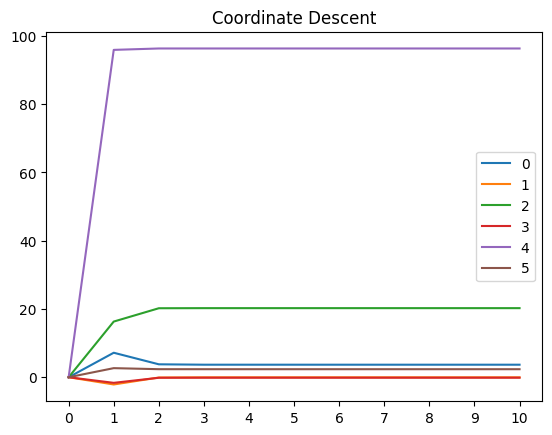

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def coordinate_descent(X, y, param, iter=1):
    # Initialize lists to store cost and parameter values at each iteration
    cost_history = [0] * iter
    param_list = []
    betaList = []
    
    # Add the initial values of the parameters to betaList
    betaList.append(param.tolist())
    
    # Loop for the specified number of iterations
    for iteration in range(iter):
        # Loop over the elements of param
        for i in range(len(param)):
            # Compute the updated value for the current parameter using a coordinate descent update rule
            dele = np.dot(np.delete(X, i, axis=1), np.delete(param, i, axis=0))
            param[i] = np.dot(X[:,i].T, (y - dele))/np.sum(np.square(X[:,i]))
            
            # Store the updated value in param_list
            param_list.append(param[i])
            
            # Compute the cost using the costf function (not defined in the code)
            cost = costf(X, y, param)
            
            # Store the cost in cost_history
            cost_history[iteration] = cost
            
        # Add the current values of the parameters to betaList
        f = [x.tolist() for x in param]
        betaList.append(f)
    
    # Return the final values of the parameters, the list of costs, and the list of parameter values at each iteration
    return param, cost_history, betaList

# Call the coordinate_descent function with some input data, target output, initial parameters set to all zeros, and iter set to 10
param, costList, betaList = coordinate_descent(X,y,np.zeros((6,1)),iter=10)

# Flatten the lists of parameter values in betaList and store the resulting lists in a new list called out
out = []
for i in betaList:
    flat_list = [item for sublist in i for item in sublist]
    out.append(flat_list)

print('Optimized Betas are: ', betaList[-1])
# Create a Pandas DataFrame from the list out and plot it using the plot method, with the xticks argument set to the range of integers from 0 to the length of the DataFrame
df = pd.DataFrame(out)
df.plot(title='Coordinate Descent', xticks=np.arange(len(df)))
plt.show()


<h3>Coordinate Descent L1 Regularization

Optimized Betas are:  [[3.6753836250064755], [-0.026230318697892895], [20.23934694635258], [-0.1339295800084226], [96.28930657623557], [2.3544833295432457]]


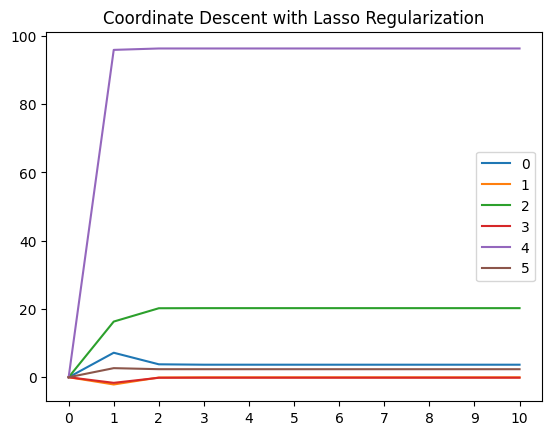

In [36]:
def soft(numerator, lamda):
    # Return numerator - lamda/2 if numerator > lamda/2
    if numerator > lamda/2:
        return numerator - lamda/2
    # Return numerator + lamda/2 if numerator < -lamda/2
    if numerator < -lamda/2:
        return numerator+lamda/2
    # Return 0 if abs(numerator) < lamda/2
    if np.abs(numerator) < lamda/2:
        return 0

def cd_lasso(X, y, lamda, iter=100):
    # Initialize a list to store the cost at each iteration
    cost_history = [0] * iter
    # Initialize the parameters to all zeros
    param =  np.zeros((6,1))
    # Initialize a list to store the values of the parameters at each iteration
    betaList = []
    # Add the initial values of the parameters to betaList
    betaList.append(param.tolist())
    
    # Loop for the specified number of iterations
    for iteration in range(iter):
        # Loop over the elements of param
        for i in range(len(param)):
            # Compute the updated value for the current parameter using a coordinate descent update rule with lasso regularization
            dele = np.dot(np.delete(X, i, axis=1), np.delete(param, i, axis=0))
            num_i = np.dot(X[:,i].T, (y - dele))
            denom = np.sum(np.square(X[:,i]))
            param[i] = soft(num_i, lamda)/denom
            
            # Compute the cost using the costf function (not defined in the code)
            cost = costf(X, y, param)
            
            # Store the cost in cost_history
            cost_history[iteration] = cost
        
        # Add the current values of the parameters to betaList
        f = [x.tolist() for x in param]
        betaList.append(f)
    
    # Return the final values of the parameters, the list of costs, and the list of parameter values at each iteration
    return param, cost_history, betaList
    
# Call the cd_lasso function with some input data, target output, and a value for lamda
param1, costList1, betaList1 = cd_lasso(X,y,0.1,iter=10)

# Flatten the lists of parameter values in betaList1 and store the resulting lists in a new list called out
out = []
for i in betaList1:
    flat_list = [item for sublist in i for item in sublist]
    out.append(flat_list)

print('Optimized Betas are: ', betaList1[-1])
# Create a Pandas DataFrame from the list out and plot it using the plot method, with the xticks argument set to the range of integers from 0 to the length of the DataFrame
df = pd.DataFrame(out)
df.plot(title='Coordinate Descent with Lasso Regularization', xticks=np.arange(len(df)))
plt.show()

<h3>Compare the plots of the unregularized and regularized CD

<h3><span style="color:blue">There seems to be no difference in the models. The betas have the same values for regularized and the non-regularized models. This can happen if the regularization term is set to 0, or if the weights of the model are already small enough such that the regularization term has no effect on the optimization process. IN our case the regularisation term is 0.1.</span>

<h3>How is the Coordinate Descent method different from SGD and Newton’s method? In which case is it
advisable to use the CD method?

<h3><span style="color:blue">Coordinate descent is an optimization algorithm that iteratively updates a single variable at a time while holding all other variables fixed. It is slower than other optimization algorithms such as stochastic gradient descent (SGD) and Newton's method, but it can be useful in certain scenarios where the optimization problem has a special structure or large amounts of sparse data. It is often used in large-scale optimization problems and in optimization problems with sparse data.</span>